<a href="https://colab.research.google.com/github/kietbg0079/flower_library/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile as zp

In [ ]:
path = '/content/drive/MyDrive/AIP302/flower_data.zip'

raw_data = zp.ZipFile(path)
raw_data.extractall('/content/')

In [ ]:
import math
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil 

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers,optimizers

from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization

#from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint, LearningRateScheduler

from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input

'1.19.5'

In [ ]:
batch_size = 64
img_height = 224
img_width = 224

In [ ]:
TRAINING_DIR = '/content/flower_data/train'



train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))


VALIDATION_DIR = '/content/flower_data/valid'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width))  

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [ ]:
adam = Adam(learning_rate=3e-4)

resnet101_base = ResNet101(include_top=True, weights='imagenet',
                          input_shape=(img_width, img_height,3))

output = resnet101_base.get_layer(index = -1).output  
output = Flatten()(output)

output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(102, activation='softmax')(output)

resnet101_model = Model(resnet101_base.input, output)
for layer in resnet101_model.layers[:-7]:
    layer.trainable = False
resnet101_model.summary()

resnet101_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
!cd '/content/drive/MyDrive/AIP302'

In [ ]:
resnet101_model.load_weights('/content/drive/MyDrive/AIL201/AIP302/Landmark_weights_epoch-53_loss-1.1591_val_loss-1.4267.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
shutil.move("/content/mobilenet_js", "/content/drive/MyDrive")

'/content/drive/MyDrive/mobilenet_js'

In [ ]:
import tensorflowjs as tfjs
import os

#os.mkdir('mobilenet_js')
tfjs.converters.save_keras_model(resnet101_model, 'mobilenet_js')


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
epoch = 100

history = resnet101_model.fit(train_generator,
                              epochs=epoch,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [ModelCheckpoint('Landmark_weights_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                                          monitor='val_loss',
                                                          verbose=1,
                                                          save_best_only=True,
                                                          save_weights_only=True,
                                                          mode='auto',
                                                          period=1),
                                          EarlyStopping(monitor='val_loss',
                                                        patience=7, 
                                                        verbose=1, 
                                                        min_delta=0.001),
                              
                              ])

In [ ]:
import shutil

In [ ]:
shutil.move('/content/Landmark_weights_epoch-53_loss-1.1591_val_loss-1.4267.h5', '/content/drive/MyDrive/AIP302')

'/content/drive/MyDrive/AIP302/Landmark_weights_epoch-53_loss-1.1591_val_loss-1.4267.h5'

In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image
from keras.preprocessing import image

In [ ]:
img = image.load_img('/content/flower_data/test/image_00005.jpg', target_size=(224,224))
arr = image.img_to_array(img)
print(arr.shape)
arr = np.expand_dims(arr, 0)
arr = preprocess_input(arr)

print(arr.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
pre_arr = resnet101_model.predict(arr)

In [ ]:
for i in range(1,103):
  print(str(i) + " : ")

1 : 
2 : 
3 : 
4 : 
5 : 
6 : 
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : 
15 : 
16 : 
17 : 
18 : 
19 : 
20 : 
21 : 
22 : 
23 : 
24 : 
25 : 
26 : 
27 : 
28 : 
29 : 
30 : 
31 : 
32 : 
33 : 
34 : 
35 : 
36 : 
37 : 
38 : 
39 : 
40 : 
41 : 
42 : 
43 : 
44 : 
45 : 
46 : 
47 : 
48 : 
49 : 
50 : 
51 : 
52 : 
53 : 
54 : 
55 : 
56 : 
57 : 
58 : 
59 : 
60 : 
61 : 
62 : 
63 : 
64 : 
65 : 
66 : 
67 : 
68 : 
69 : 
70 : 
71 : 
72 : 
73 : 
74 : 
75 : 
76 : 
77 : 
78 : 
79 : 
80 : 
81 : 
82 : 
83 : 
84 : 
85 : 
86 : 
87 : 
88 : 
89 : 
90 : 
91 : 
92 : 
93 : 
94 : 
95 : 
96 : 
97 : 
98 : 
99 : 
100 : 
101 : 
102 : 


In [ ]:
np.where(pre_arr == (np.max(pre_arr)))[1][0]

77

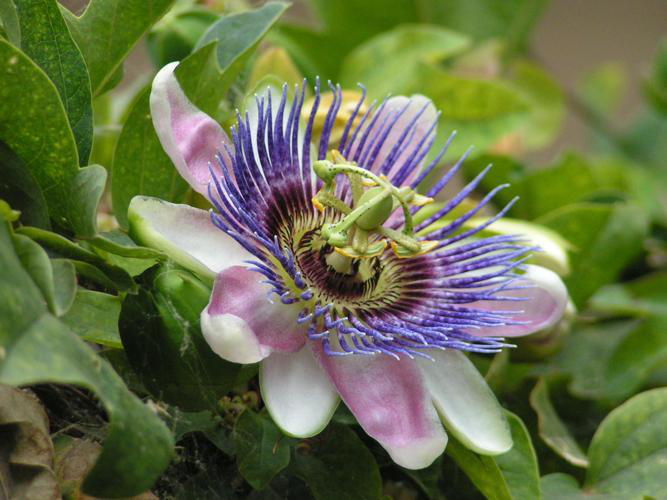

In [ ]:
Image.open('/content/flower_data/train/77/image_00008.jpg')

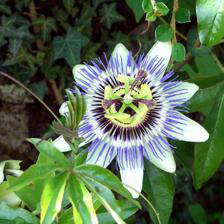

In [ ]:
Image.open('/content/newpic.jpg')

In [ ]:
def load_image(img_path, show=False):

    imgs = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(imgs)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


image = load_image('/content/flower_data/test/image_00005.jpg')

AttributeError: ignored

In [ ]:
np.where(lst_po == np.max(lst_po))

(array([0]), array([71]))